<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1-[30-marks]" data-toc-modified-id="Question-1-[30-marks]-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1 [30 marks]</a></span></li><li><span><a href="#Question-2-[30-marks]" data-toc-modified-id="Question-2-[30-marks]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2 [30 marks]</a></span></li><li><span><a href="#Question-3-[40-marks]" data-toc-modified-id="Question-3-[40-marks]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 3 [40 marks]</a></span></li></ul></div>

# Computational Mathematics <a class="tocSkip">

## 2023/24 Assessment - solutions <a class="tocSkip">

## Release: 10AM Thursday 2 November 2023 <a class="tocSkip">

## Deadline: 5PM Friday 3 November 2023 <a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module "Computational Mathematics" for year 2023/24.


- **This is independent work, you cannot work in groups.**


- This notebook contains three questions. Please answer all questions.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use any library we used in lectures, and you may reuse any code from lectures and homeworks. If you use an algorithm not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.


- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - **please submit a version where you have run all of the cells and all the outputs/plots etc are visible without the marker having to run the notebook themselves**.
    
    

- If you are happy to write down your mathematical work in the form of Latex directly within this notebook then feel free to do this.


- Alternatively you may if you choose submit parts of your answers via **scans or photos of hand written pages** - feel free to use this option in particular for supplementary sketches, equations or where I have asked you to complete a task with "pen and paper". You will not be marked down for not embedding equations into your markdown cells. Please make sure that the question number each sheet you scan refers to is very clear. Even if you embed the images within the notebook, please also commit the images files to your github submission.

In [1]:
# update as necessary for your solutions
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.interpolate as si
from mpltools import annotation
import scipy.integrate

# Question 1 [30 marks]

Consider the following two statements

<br>

1. All models are wrong, but some are useful.


2. A model may get the right answer for the wrong reason.


<br>

Where here we interpret a "model" as a piece of code written to provide a synthetic representation of some real world phenomena.

<br>

- (a) Explain what each of these two statements means and why they are important. 

<br>

- (b) What can we as "model" developers do to mitigate the issues that may be implied by these two statements.

<br>

- (c) Explain the concepts of code verification, solution verification, model validation and model calibration. Use your own invented example to support your answers, where your model can be written in the form of a solution to a linear system.


##### <font color=blue > (a) Explain ''All models are wrong, but some are useful.'' </font>
This statement emphasises the inherent limitations of models. No model can capture every detail and nuance of the real world. Instead, a model is a simplification or abstraction of a real problem, designed to capture the essential characteristics of a system or process (all models are approximations). 

The usefulness of a model depends on the extent to which it can provide insights, predictions, or understanding within the context of its application. Even though a model may not be completely accurate, it is still valuable if it contributes to decision-making or understanding of a phenomenon. We should rate whether a model is good enough by how it performs in a particular task.

##### <font color=blue>Explain ''A model may get the right answer for the wrong reason.''
This statement emphasises the risk of misinterpreting the success of a model. The model may provide correct predictions or outputs, but the reason for this is that it does not accurately reflect the underlying reality (it only provides correct predictions or outputs in very limited circumstances and is not robust). 

This may occur because of overfitting, coincidental correlations, or unconsidered variables. When applied to new data or under different conditions, these models may fail. This phenomenon is particularly critical in areas such as machine learning, where models may learn spurious patterns that do not generalise well. This insight is very important as it reminds us that we need to be careful when developing our models, and we need to make sure that our models are set up to predict the results in the right way and not just happen to get the right results.

##### <font color=blue>(b) Mitigation Strategies for Model Developers</font>
I. **Recognise the limitations of the model.**
No model is perfect, and as a developer you need to be aware of the limitations of the model itself, and explicitly state them when releasing the model (the range of values that apply, the application scenarios).

II. **Improve model robustness** and test models extensively under a variety of conditions. Evaluate model performance using historical and synthetic data.

III. In machine learning, use techniques like **cross-validation** to ensure that the model performs well on unseen data.

IV. Understanding why a model makes certain predictions can help identify whether it is doing so for the right reasons.

V. Regularly **update the model** with new data and insights. Be prepared to recalibrate or adjust as needed.

##### <font color=blue>(c) Explain the concepts of code verification, solution verification, model validation and model calibration.</font>
**Code verification:** 
Ensure that the code accurately implements the intended model or algorithm. It is related to the correctness of the code.

Example: Verify that the code correctly solves the linear system $f = kx + c$ . Tests can be performed with known solutions to confirm that the code works as expected."8 = 2$*$3 + 2", "10 = 2$*$4 + 2".

**Solution verification:**
Ensure that the solution obtained from the code is accurate and stable. It involves numerical issues such as convergence and error estimation.

Example: Check the accuracy of the numerical solution for $Ax=b$. This may involve evaluating the residuals or comparing with known solutions.

**Model validation:**
Ensure that the model accurately represents the real-world system it is intended to simulate. It relates to the realism and fidelity of the model. Make sure we don't just happen to get the right answer using the wrong model.

Example: Compare the predicted solution for $f = kx + c$ with real-world measurements to ensure that the model captures the true behaviour of the system. Most commonly, different magnitudes of force are applied to a spring to measure the change in length. Compare the difference between the real measurements and the results obtained from equation.

**Model calibration:**
Adjustment of model parameters to improve consistency with real-world data. It is related to fine-tuning the model.

Example: Adjust the coefficient A in the linear system Ax=b to improve the predictive power of the model based on observed data.


# Question 2 [30 marks]

Consider a function of one independent variable: $f(x)$.

<br>

The first-order forward difference approximation to the derivative of $f$ at location $x$ is given by

$$ f'(x)\approx \frac{f(x+\Delta x)-f(x)}{\Delta x} $$

The second-order central difference approximation to the derivative of $f$ at location $x$ is given by 

$$ f'(x)\approx \frac{f(x+\Delta x)-f(x - \Delta x)}{2 \Delta x} $$

The fourth-order central difference approximation to the derivative of $f$ at location $x$ is given by

$$ f'(x)\approx \frac{-f(x + 2\Delta x) + 8 f(x+\Delta x)- 8 f(x - \Delta x) + f(x - 2\Delta x)}{12 \Delta x} $$

<br>

- Use Taylor series analyses to confirm the orders of accuracies of the above approximations.

<br>

- Implement these approximations in code, and verify your implementations using the fact that

$$\left. \frac{d}{dx} \exp (x) \right|_{x=1} = \exp(1) $$

- Explain why such a verification exercise give you faith that your implementations are correct.

<br>

- Demonstrate what happens if you take $\Delta x$ values that are too large or too small, i.e. as $\Delta x\rightarrow 0 $ and $\Delta x\rightarrow \infty $. Comment on whether the behaviour you observe is what you expect, and why?

##### <font color=blue>**Taylor expansion.**</font>

$$f(x + \Delta x) = f(x) + \frac{{f'(x)}}{{1!}} (\Delta x) + \frac{{f''(x)}}{{2!}} (\Delta x)^2 + \frac{{f'''(x)}}{{3!}} (\Delta x)^3 + \frac{{f^{(4)}(x)}}{{4!}} (\Delta x)^4 + \frac{{f^{(5)}(x)}}{{5!}} (\Delta x)^5 + \frac{{f^{(6)}(x)}}{{6!}} (\Delta x)^6 + \cdots \tag{1}$$

$$f(x - \Delta x) = f(x) - \frac{{f'(x)}}{{1!}} (\Delta x) + \frac{{f''(x)}}{{2!}} (\Delta x)^2 - \frac{{f'''(x)}}{{3!}} (\Delta x)^3 + \frac{{f^{(4)}(x)}}{{4!}} (\Delta x)^4 - \frac{{f^{(5)}(x)}}{{5!}} (\Delta x)^5 + \frac{{f^{(6)}(x)}}{{6!}} (\Delta x)^6 + \cdots \tag{2}$$

$$f(x + 2\Delta x) = f(x) + \frac{{f'(x)}}{{1!}} (2\Delta x) + \frac{{f''(x)}}{{2!}} (2\Delta x)^2 + \frac{{f'''(x)}}{{3!}} (2\Delta x)^3 + \frac{{f^{(4)}(x)}}{{4!}} (2\Delta x)^4 + \frac{{f^{(5)}(x)}}{{5!}} (2\Delta x)^5 + \frac{{f^{(6)}(x)}}{{6!}} (2\Delta x)^6 + \cdots \tag{3}$$

$$f(x - 2\Delta x) = f(x) - \frac{{f'(x)}}{{1!}} (2\Delta x) + \frac{{f''(x)}}{{2!}} (2\Delta x)^2 - \frac{{f'''(x)}}{{3!}} (2\Delta x)^3 + \frac{{f^{(4)}(x)}}{{4!}} (2\Delta x)^4 - \frac{{f^{(5)}(x)}}{{5!}} (2\Delta x)^5 + \frac{{f^{(6)}(x)}}{{6!}} (2\Delta x)^6 + \cdots \tag{4}$$

##### <font color=blue>The first-order forward difference.</font>

$$\frac{f(x + \Delta x) - f(x) }{\Delta x}= f'(x) + \frac{{f''(x)}}{{2!}}(\Delta x) + \frac{{f'''(x)}}{{3!}}(\Delta x)^2 + \cdots 
$$
$$f'(x) =\frac{f(x + \Delta x) - f(x) }{\Delta x} +O(\Delta x) 
$$


##### <font color=blue>The second-order central difference.</font>

$$f(x + \Delta x)-f(x - \Delta x) = (1) - (2)$$

$$(1) - (2) = (f(x)-f(x))+ (\frac{{f'(x)}}{{1!}} (\Delta x)+\frac{{f'(x)}}{{1!}} (\Delta x)) + (\frac{{f''(x)}}{{2!}} (\Delta x)^2 - \frac{{f''(x)}}{{2!}} (\Delta x)^2) + (\frac{{f'''(x)}}{{3!}} (\Delta x)^3+\frac{{f'''(x)}}{{3!}} (\Delta x)^3) +\cdots
$$

$$(1) - (2) = 2\frac{{f'(x)}}{{1!}} (\Delta x) + 2\frac{{f'''(x)}}{{3!}} (\Delta x)^3 +\cdots \tag {5}
$$

$$\frac{f(x + \Delta x)-f(x - \Delta x)}{2\Delta x} = \frac{(1) - (2)}{2\Delta x} = f'(x) + O(\Delta x^2)
$$

$$f'(x) = \frac{f(x + \Delta x)-f(x - \Delta x)}{2\Delta x} + O(\Delta x^2)
$$


##### <font color=blue>The fourth-order central difference.</font>

$$\frac{-f(x + 2\Delta x) + 8 f(x+\Delta x)- 8 f(x - \Delta x) + f(x - 2\Delta x)}{12 \Delta x} = \frac{-(3) + 8 (1)- 8 (2) + (4)}{12 \Delta x}$$

$$ (4) - (3) = - 2\frac{{f'(x)}}{{1!}} (2\Delta x) - 2\frac{{f'''(x)}}{{3!}} (2\Delta x)^3 - 2\frac{{f^{(5)}(x)}}{{5!}} (2\Delta x)^5+ \cdots$$

$$ (4) - (3) = - 4\frac{{f'(x)}}{{1!}} (\Delta x) - 16\frac{{f'''(x)}}{{3!}} (\Delta x)^3 - 64\frac{{f^{(5)}(x)}}{{5!}} (\Delta x)^5+ \cdots$$

$$ 8(1) - 8(2) = 8(5) = 16 \frac{{f'(x)}}{{1!}} (\Delta x) + 16 \frac{{f'''(x)}}{{3!}} (\Delta x)^3 + 16 \frac{{f^{(5)}(x)}}{{5!}} (\Delta x)^5+ \cdots$$

$$-(3) + 8 (1)- 8 (2) + (4) = 12\frac{{f'(x)}}{{1!}} (\Delta x) - 48\frac{{f^{(5)}(x)}}{{5!}} (\Delta x)^5 + \cdots $$

$$\frac{-(3) + 8 (1)- 8 (2) + (4)}{12 \Delta x} = f'(x) -4\frac{{f^{(5)}(x)}}{{5!}} (\Delta x)^4$$

$$f'(x) = \frac{-f(x + 2\Delta x) + 8 f(x+\Delta x)- 8 f(x - \Delta x) + f(x - 2\Delta x)}{12 \Delta x} + O(\Delta x^4)$$

$$$$

##### Implement these approximations in code.

##### Then, use  $\left. \frac{d}{dx} \exp (x) \right|_{x=1} = \exp(1) $ to verify implementations.

In [2]:
import math

def first_order_forward_diff(f, x, delta_x):
    return (f(x + delta_x) - f(x)) / delta_x

def second_order_central_diff(f, x, delta_x):
    return (f(x + delta_x) - f(x - delta_x)) / (2 * delta_x)

def fourth_order_central_diff(f, x, delta_x):
    return (-f(x + 2*delta_x) + 8*f(x + delta_x) - 8*f(x - delta_x) + f(x - 2*delta_x)) / (12 * delta_x)

x = 1
delta_x = 0.01
f = math.exp

print("First-order:", first_order_forward_diff(f, x, delta_x))
print("Second-order:", second_order_central_diff(f, x, delta_x))
print("Fourth-order:", fourth_order_central_diff(f, x, delta_x))
print("Actual:", math.exp(1))


First-order: 2.7319186557871245
Second-order: 2.718327133382714
Fourth-order: 2.7182818275529415
Actual: 2.718281828459045


By using exp(x), we know that its derivative is itself. When x = 1, the derivative is e. 

Comparing approximations obtained using different accuracies with known values proves whether the implementations are correct. If the implementations are correct, then they should be very close to the known values, especially if $\Delta x$ is very small.

##### <font color=blue>How the change in the value of Δ𝑥 affects our output results.</font>

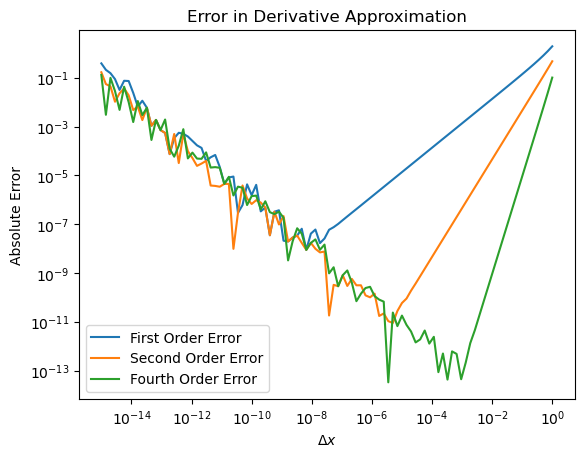

In [3]:
# Define a range of delta_x values
delta_xs = np.logspace(-15, 0, 100) # from 10^-15 to 10^0

# Prepare lists to store the errors for different methods
errors_first_order = []
errors_second_order = []
errors_fourth_order = []

# Calculate errors for each delta_x
for delta_x in delta_xs:
    derivative_first_order = first_order_forward_diff(f, 1, delta_x)
    derivative_second_order = second_order_central_diff(f, 1, delta_x)
    derivative_fourth_order = fourth_order_central_diff(f, 1, delta_x)
    
    error_first_order = abs(derivative_first_order - math.exp(1))
    error_second_order = abs(derivative_second_order - math.exp(1))
    error_fourth_order = abs(derivative_fourth_order - math.exp(1))
    
    errors_first_order.append(error_first_order)
    errors_second_order.append(error_second_order)
    errors_fourth_order.append(error_fourth_order)

# Plotting the errors
plt.loglog(delta_xs, errors_first_order, label='First Order Error')
plt.loglog(delta_xs, errors_second_order, label='Second Order Error')
plt.loglog(delta_xs, errors_fourth_order, label='Fourth Order Error')
plt.xlabel('$\Delta x$')
plt.ylabel('Absolute Error')
plt.legend()
plt.title('Error in Derivative Approximation')
plt.show()


We expect that if the value of $\Delta$x increases, our approximation becomes inaccurate because we lose more of the curvature of the function. Conversely, if the value of x decreases, our accuracy will increase.

**But,** the actual output is not exactly what we expected.

For very large $\Delta$x, all methods show significant errors. (which is as we expected).

On the other hand, we can clearly see that as we keep decreasing the value of $\Delta$x, the absolute error does not continue to decrease, but rather bounces back after reaching a critical value.

As $\Delta$x decreases, the error should decrease for each method, but at different rates according to their order of accuracy.

After reaching a certain point of small $\Delta$x, the error start to increase again due to **floating-point arithmetic errors.**

The crossover points where the error starts increasing again provide a practical limit on the smallest useful $\Delta$x for each method on a given floating-point arithmetic system.

# Question 3 [40 marks]

Consider the following function over the interval $[-1,1]$. 

In [4]:
def our_func(x):
    # you can vary the 100 that appears below to change a key behaviour of this function
    # feel free to update this function to pass it in as a variable
    return 1.0 + (0.2 / (1.0 + (100.0 * x**2)))



This function has been chosen because it is challenging to interpolate and to numerically integrate due to its rapid variation around $x=0$.

But varying the number 100 that appears in this formula we can make it more/less of a challenging problem to interpolate/integrate.

This is a two part question on (a) interpolation and (b) quadrature.

Note that we can use Sympy to differentiate this function and to provide indefinite and definite integrals to this function as follows

In [5]:

# import Python's symbolic math library
import sympy as sym
# print maths nicely:
sym.init_printing()
# define the 'symbols' that will be our variables/parameters
x = sym.symbols('x')
# define a function 
expr = 1.0 + (0.2 / (1.0 + (100.0 * x**2))) 
# print it out to check it's correct
expr

In [6]:
# this is its indefinite integral
sym.integrate(expr,x)

In [7]:
# and this is its definite integral between bounds -1 and 1 - we store it in variable true_int
# for later use in computing errors.
true_int = sym.integrate(expr,(x,-1,1))
print(true_int)

2.05884510697215


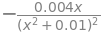

In [8]:
# if you wanted to differentiate once, this is how you could do it
sym.diff(expr, x)

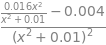

In [9]:
# and the second derivative
sym.diff(expr, x, x)
# and so on

**(a) Interpolation**

- Firstly plot the function and explain how making the 100 that appears in the function larger and smaller (e.g. try halving and doubling it) changes the function's behaviour and why this behaviour makes this a challenging problem to interpolate. Please only consider piecewise polynomial interpolation with relatively low order polynomials within this question (you do not need to consider the "Runge phenomena" mentioned in class).

<br>

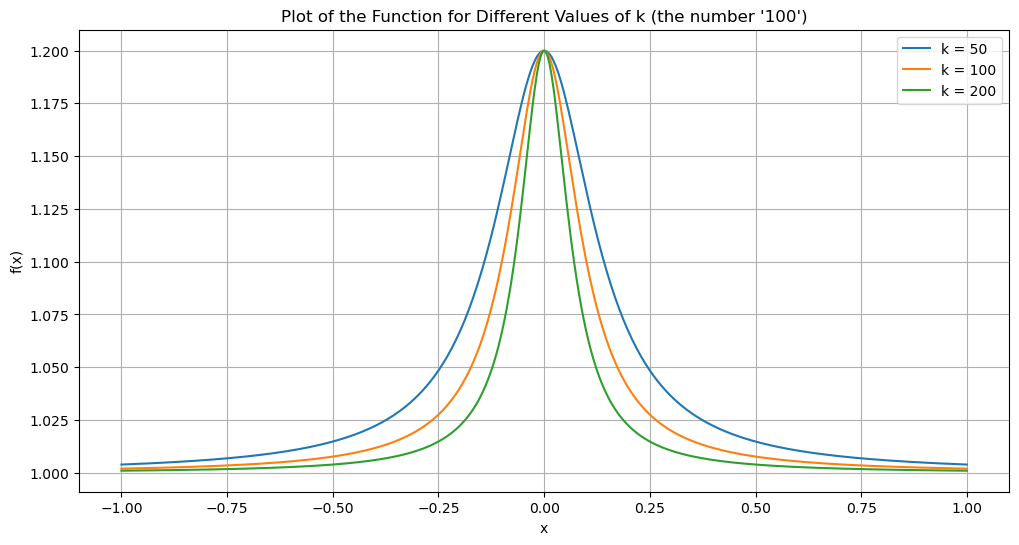

In [10]:
def our_func(x, k):
    return 1.0 + (0.2 / (1.0 + (k * x**2)))

x_values = np.linspace(-1, 1, 400)

plt.figure(figsize=(12, 6))

for k in [50, 100, 200]:
    y_values = our_func(x_values, k)
    plt.plot(x_values, y_values, label=f'k = {k}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Plot of the Function for Different Values of k (the number '100')")
plt.legend()
plt.grid(True)
plt.show()


##### <font color=blue>How the change in the number "100" (constant k) affects the image.</font>
**Height of the Peak:** As "k" increases, the peak of the function at 
x=0 becomes sharper and more pronounced. This is because the denominator of the fraction 1+kx^2 becomes smaller around x=0, making the fraction, and hence the function become larger.

**Width of the Peak:** The width of the peak also decreases as "k" increases. The function approaches 1 more quickly, when move away from x=0.


##### <font color=blue>Implications for Interpolation</font>
With a larger k, the peak becomes more pronounced and narrow. Polynomial interpolants, especially those of lower order, struggle to accurately capture such sharp changes over a small interval. Even if the rest of the function is well-approximated, this central peak poses a significant challenge. This means that even piecewise polynomial interpolation might require a very fine partition around "x=0" to accurately represent the function.

- Now use piecewise polynomial interpolation to approximate the function, demonstrating how the error in your approximation varies with number of "pieces" (i.e. sub intervals) and polynomial order.

<br>

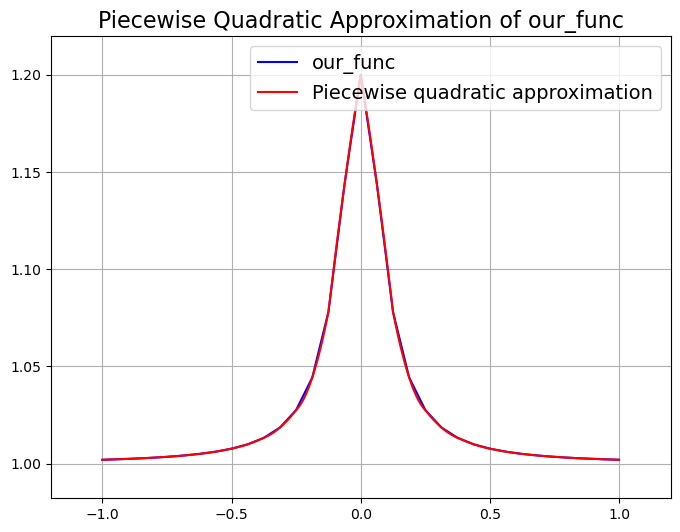

In [11]:
def our_func(x, k=100):
    return 1.0 + (0.2 / (1.0 + (k * x**2)))

# Define the x values at which we evaluate our_func
xi = np.linspace(-1, 1, 33)
yi = our_func(xi)

# Construct the interpolant at these x points for plotting
x = np.linspace(np.min(xi), np.max(xi), 1000)

# Initialize the value of our interpolant at x to zero
P2 = np.zeros_like(x)

# Loop over collections of three data points from (xi, yi), i is the mid value
for i in range(1, len(xi)-1, 2):
    # Use polyfit to construct a local quadratic polynomial fit to data at i-1, i, i+1
    P2_loc = np.polyfit(xi[i - 1:i + 2], yi[i - 1:i + 2], 2)
    # Use polyval to evaluate P2_loc at the x values for x in [x_{i-1}, x_{i+1}]
    P2 += np.polyval(P2_loc, x) * (x >= xi[i - 1]) * (x <= xi[i + 1])

# Plotting
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.plot(xi, yi, 'b', label='our_func')
ax1.plot(x, P2, 'r', label='Piecewise quadratic approximation')
ax1.set_title('Piecewise Quadratic Approximation of our_func', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)
plt.show()


In [12]:
import warnings
from numpy import RankWarning

# Ignore RankWarning from numpy.polyfit
warnings.simplefilter('ignore', RankWarning)

In [13]:
# Dense linspace for plotting and error calculation
x_dense = np.linspace(-1, 1, 1000)
y_dense = our_func(x_dense)

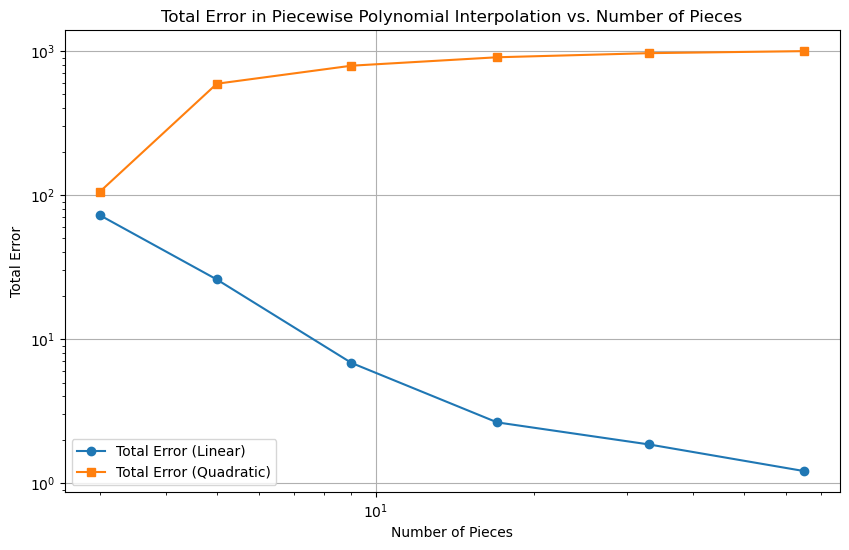

In [14]:
# Numbers of points to test for our piecewise polynomial interpolations
num_points = [3, 5, 9, 17, 33, 65]
total_errors_linear = []
total_errors_quadratic = []

# Iterate over different numbers of points for interpolation
for n in num_points:
    # Generate points and evaluate the function
    xi = np.linspace(-1, 1, n)
    yi = our_func(xi)
    
    # Initialize the interpolants
    P1 = np.zeros_like(x_dense)
    P2 = np.zeros_like(x_dense)
    
    # Construct the piecewise linear and quadratic interpolants
    for i in range(len(xi) - 1):
        # Linear fit for each interval
        P1_loc = np.polyfit(xi[i:i + 2], yi[i:i + 2], 1)
        P1 += np.polyval(P1_loc, x_dense) * (x_dense >= xi[i]) * (x_dense < xi[i + 1])

        # Quadratic fit for every other interval (if possible)
        if i < len(xi) - 2:
            P2_loc = np.polyfit(xi[i:i + 3], yi[i:i + 3], 2)
            P2 += np.polyval(P2_loc, x_dense) * (x_dense >= xi[i]) * (x_dense < xi[i + 2])
    
    # Calculate the total error for this number of points
    total_error_linear = np.sum(np.abs(y_dense - P1))
    total_errors_linear.append(total_error_linear)

    total_error_quadratic = np.sum(np.abs(y_dense - P2))
    total_errors_quadratic.append(total_error_quadratic)

# Plotting the total error vs. number of pieces for both interpolants
plt.figure(figsize=(10, 6))
plt.plot(num_points, total_errors_linear, 'o-', label='Total Error (Linear)')
plt.plot(num_points, total_errors_quadratic, 's-', label='Total Error (Quadratic)')
plt.xlabel('Number of Pieces')
plt.ylabel('Total Error')
plt.title('Total Error in Piecewise Polynomial Interpolation vs. Number of Pieces')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

##### <font color=blue>How the error in  approximation varies with number of "pieces"  and polynomial order.</font>
The maximum error continues to decrease as the number of pieces increases, but the total error does not always.

From the plot of total error and number of slices we can see that the total error of first order interpolation keeps decreasing with the increase of the number of slices, whereas the total error of bivalent interpolation increases with the increase of the number of slices, which may be due to the fact that our original function is not suitable to be fitted using second order interpolation.

In this task, first-order interpolation performed better than second-order interpolation.

- Given that this function varies a lot in the middle of our interval, but less so away from the origin, investigate how you might be able to use non uniform sized sub-intervals in order to balance accuracy in your approximation vs the number of sub-intervals or function evaluations.

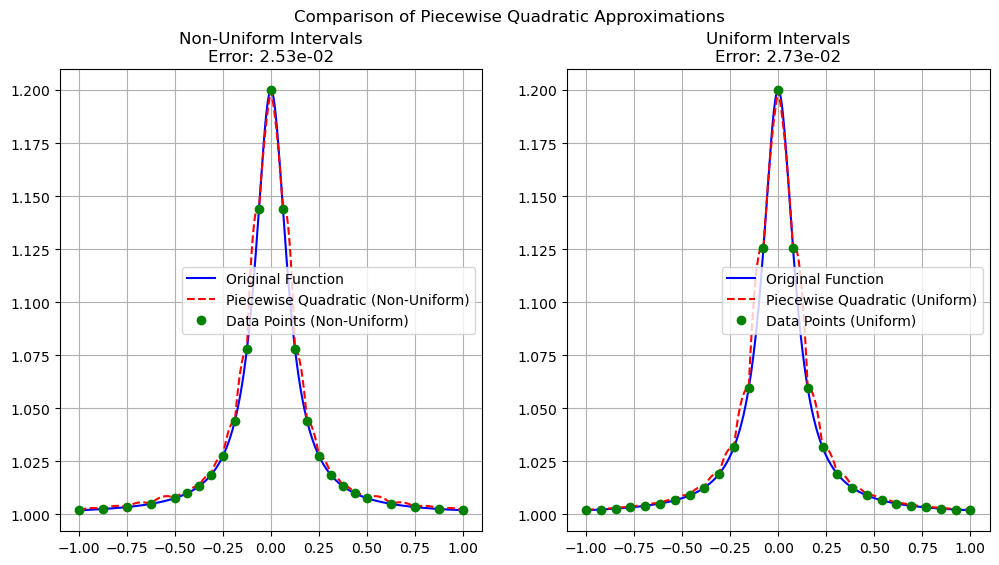

In [15]:
def piecewise_quadratic_approximation(xi, x_range):
    yi = our_func(xi)
    P = np.zeros_like(x_range)
    for i in range(len(xi) - 1):
        P_loc = np.polyfit(xi[i:i + 2], yi[i:i + 2], 2)
        P += np.polyval(P_loc, x_range) * (x_range >= xi[i]) * (x_range <= xi[i + 1])
    true_values = our_func(x_range)
    error = np.max(np.abs(true_values - P))
    return P, error

# Define the range for x
x_range = np.linspace(-1, 1, 1000)

# Non-Uniform Allocation
endpoints = np.array([-1, -0.5, -0.25, 0.25, 0.5, 1])
num_intervals_non_uniform = [4, 4, 8, 4, 4]
xi_non_uniform = np.array([-1])
for i, num in enumerate(num_intervals_non_uniform):
    xi_non_uniform = np.append(xi_non_uniform, np.linspace(endpoints[i], endpoints[i + 1], num + 1)[1:])

P_non_uniform, error_non_uniform = piecewise_quadratic_approximation(xi_non_uniform, x_range)

# Uniform Allocation
num_intervals_uniform = 26  # Same total number of intervals as non-uniform
xi_uniform = np.linspace(-1, 1, num_intervals_uniform + 1)

P_uniform, error_uniform = piecewise_quadratic_approximation(xi_uniform, x_range)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_range, our_func(x_range), 'b', label='Original Function')
plt.plot(x_range, P_non_uniform, 'r--', label='Piecewise Quadratic (Non-Uniform)')
plt.plot(xi_non_uniform, our_func(xi_non_uniform), 'go', label='Data Points (Non-Uniform)')
plt.title(f'Non-Uniform Intervals\nError: {error_non_uniform:.2e}')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_range, our_func(x_range), 'b', label='Original Function')
plt.plot(x_range, P_uniform, 'r--', label='Piecewise Quadratic (Uniform)')
plt.plot(xi_uniform, our_func(xi_uniform), 'go', label='Data Points (Uniform)')
plt.title(f'Uniform Intervals\nError: {error_uniform:.2e}')
plt.legend()
plt.grid(True)

plt.suptitle('Comparison of Piecewise Quadratic Approximations')
plt.show()


##### <font color=blue>Use non uniform sized sub-intervals.</font>
We manually assigned more intervals where X took values closer to 0, and fewer intervals away from 0 closer to 1. Because of the nature of the original function, this allocation provides us with outputs with less error.

(b) Quadrature

- Use some of the methods we considered in lectures to approximate the definite integral to this function over the interval stated above. Compare their performance in terms of error vs number of sub-intervals.

<br>



Exact Integral: 2.05884510697215


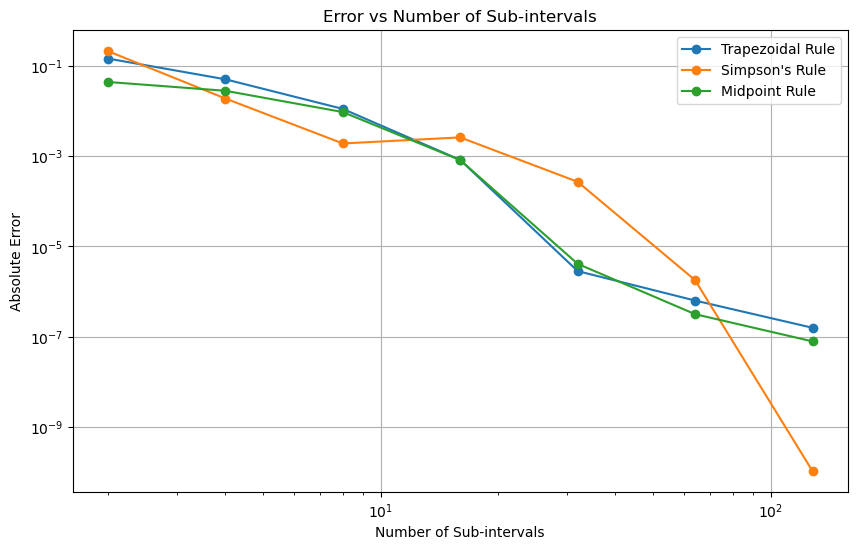

In [16]:
x = sym.symbols('x')
expr = 1.0 + (0.2 / (1.0 + (100.0 * x**2)))
true_integral = sym.integrate(expr, (x, -1, 1))
print("Exact Integral:", true_integral.evalf())

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    result = 0.5 * f(a) + 0.5 * f(b)
    for i in range(1, n):
        result += f(a + i * h)
    return result * h

def simpsons_rule(f, a, b, n):
    h = (b - a) / n
    result = f(a) + f(b)
    for i in range(1, n, 2):
        result += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        result += 2 * f(a + i * h)
    return result * h / 3

def midpoint_rule(f, a, b, n):
    h = (b - a) / n
    result = 0
    for i in range(n):
        result += f(a + (i + 0.5) * h)
    return result * h

# Exact value of the integral
exact_value = true_integral.evalf()

# Number of sub-intervals to test
sub_intervals = [2, 4, 8, 16, 32, 64, 128]

# Store errors for each method
errors_trapezoidal = []
errors_simpsons = []
errors_midpoint = []

for n in sub_intervals:
    integral_trapezoidal = trapezoidal_rule(our_func, -1, 1, n)
    integral_simpsons = simpsons_rule(our_func, -1, 1, n)
    integral_midpoint = midpoint_rule(our_func, -1, 1, n)
    
    errors_trapezoidal.append(abs(integral_trapezoidal - exact_value))
    errors_simpsons.append(abs(integral_simpsons - exact_value))
    errors_midpoint.append(abs(integral_midpoint - exact_value))

plt.figure(figsize=(10, 6))
plt.loglog(sub_intervals, errors_trapezoidal, '-o', label='Trapezoidal Rule')
plt.loglog(sub_intervals, errors_simpsons, '-o', label='Simpson\'s Rule')
plt.loglog(sub_intervals, errors_midpoint, '-o', label='Midpoint Rule')
plt.xlabel('Number of Sub-intervals')
plt.ylabel('Absolute Error')
plt.title('Error vs Number of Sub-intervals')
plt.legend()
plt.grid(True)
plt.show()


- How does the convergence analysis change if you consider error vs number of function evaluations? By considering the implementations of the Trapezoidal and Simpsons rules from lectures, how might you be able to update our basic implementations in order to minimise function evaluations (e.g. through re-use in one sub interval of function evaluations from the previous sub-interval) - try implementing and verifying these ideas.

<br>

In [17]:
# Optimized Trapezoidal Rule Implementation
def optimized_trapezoidal_rule(f, a, b, n, previous_values):
    h = (b - a) / n
    result = 0.0
    new_evaluations = 0

    if previous_values:
        # Use the previously computed trapezoidal rule as a base
        result = previous_values['integral']
        # Only calculate the new midpoints
        midpoints = [(a + (i - 0.5) * h) for i in range(1, n+1, 2)]
    else:
        # Calculate the first and last points only once
        result = 0.5 * (f(a) + f(b))
        midpoints = [(a + i * h) for i in range(1, n)]

    # Sum the midpoints
    for point in midpoints:
        result += f(point)
        new_evaluations += 1

    # Store the current integral for future use
    previous_values['integral'] = result * h
    return result * h, new_evaluations

In [18]:
# Optimized Simpson's Rule Implementation
def optimized_simpsons_rule(f, a, b, n, previous_values):
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule.")

    h = (b - a) / n
    result = 0.0
    new_evaluations = 0

    if previous_values:
        # Use the previously computed Simpson's rule as a base
        result = previous_values['integral']
        # Only calculate the new midpoints and endpoints
        midpoints = [(a + (i - 0.5) * h) for i in range(1, n+1, 2)]
        endpoints = [(a + i * h) for i in range(2, n, 2)]
    else:
        # Calculate the first and last points only once
        result = f(a) + f(b)
        midpoints = [(a + i * h) for i in range(1, n, 2)]
        endpoints = [(a + i * h) for i in range(2, n, 2)]

    # Sum the new midpoints and endpoints
    for point in midpoints:
        result += 4 * f(point)
        new_evaluations += 1
    for point in endpoints:
        result += 2 * f(point)
        new_evaluations += 1

    # Store the current integral for future use
    previous_values['integral'] = result * h / 3
    return result * h / 3, new_evaluations

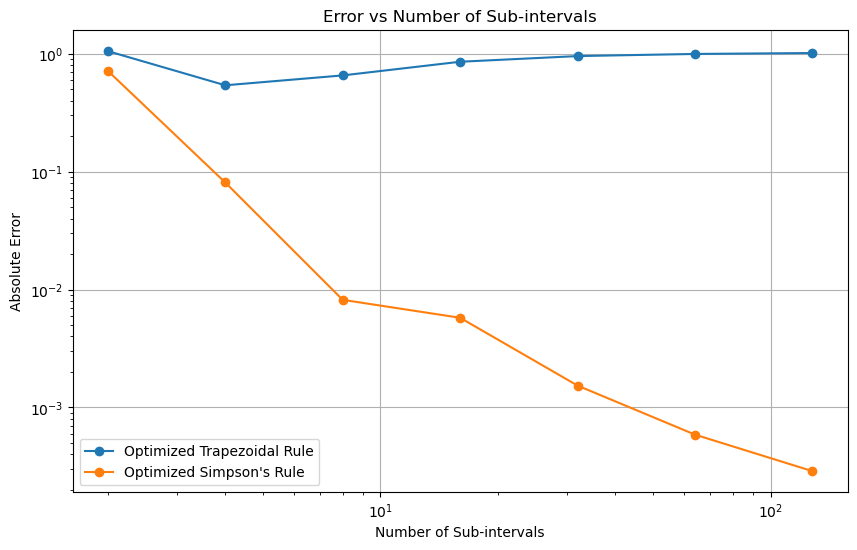

Total function evaluations for Trapezoidal Rule: 127
Total function evaluations for Simpson's Rule: 247


In [19]:
# The true value of the integral, for comparison
true_value = true_int

# Running the optimized rules and collecting errors
sub_intervals = [2, 4, 8, 16, 32, 64, 128]
errors_trapezoidal = []
errors_simpsons = []
function_evaluations_trapezoidal = 0
function_evaluations_simpsons = 0
previous_values_trap = {'integral': 0}
previous_values_simp = {'integral': 0}

for n in sub_intervals:
    integral_trapezoidal, new_eval_trap = optimized_trapezoidal_rule(our_func, -1, 1, n, previous_values_trap)
    integral_simpsons, new_eval_simp = optimized_simpsons_rule(our_func, -1, 1, n, previous_values_simp)
    
    errors_trapezoidal.append(abs(integral_trapezoidal - true_value))
    errors_simpsons.append(abs(integral_simpsons - true_value))
    
    function_evaluations_trapezoidal += new_eval_trap
    function_evaluations_simpsons += new_eval_simp

# Plotting the Results
plt.figure(figsize=(10, 6))
plt.loglog(sub_intervals, errors_trapezoidal, '-o', label='Optimized Trapezoidal Rule')
plt.loglog(sub_intervals, errors_simpsons, '-o', label='Optimized Simpson\'s Rule')
plt.xlabel('Number of Sub-intervals')
plt.ylabel('Absolute Error')
plt.title('Error vs Number of Sub-intervals')
plt.legend()
plt.grid(True)
plt.show()

# Print function evaluation counts
print(f"Total function evaluations for Trapezoidal Rule: {function_evaluations_trapezoidal}")
print(f"Total function evaluations for Simpson's Rule: {function_evaluations_simpsons}")


- Investigate the use of non-uniform sub-interval size in order to further optimise the error vs number of function evaluations relationship.